# Figure 7

In [1]:
import os.path as op
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import plotutils

In [2]:
df_dir = op.join('..', 'data', 'dataframes')

In [3]:
plotutils.set_plot_style()

### Load dataframes

In [4]:
mod_df = pd.read_csv(op.join(df_dir, 'hierarchical_output.csv'))
params_mod = pd.read_csv(op.join(df_dir, 'hierarchical_fits.csv'))

###  Figure 7b

In [5]:
pal = ['#d95f02', '#e6a778']

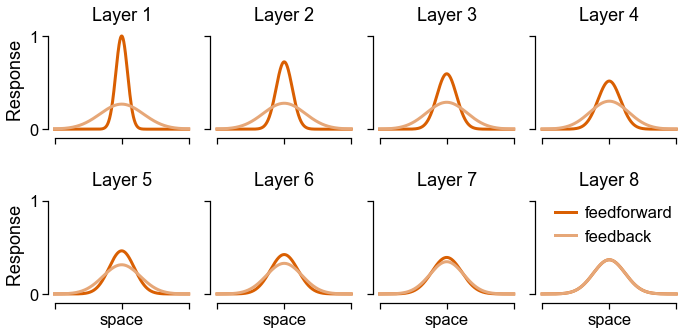

In [6]:
g = sns.relplot(x='theta', y='activity', col='layer',  hue='model',
                palette=pal, hue_order=['forward', 'reverse'], col_wrap=4, 
                kind='line', legend=False, aspect=1, height=2.5, linewidth=3,
                data=mod_df.query("stim_size==15 & filter_sigma==15 & n_layers==8"))

g.set(xlabel="", xticks=[-180, 0, 180], xticklabels=['', 'space', ''], ylim=[-.1, 1.1], yticks=[0, 1])
g.set_ylabels(' Response')
g.set_titles(col_template="Layer {col_name}")

plt.legend(labels=['feedforward', 'feedback'], title='', loc='center left', frameon=False, 
           bbox_to_anchor=(.03, 0.7), handlelength=1.3, handletextpad=.5)

sns.despine(trim=True)
plt.gcf().tight_layout(w_pad=.5, h_pad=1.5)

### Figure 7c

In [7]:
pmod_plot = params_mod.melt(id_vars=['model', 'layer', 'n_layers', 'filter_sigma', 'stim_size'], 
                            value_vars= ['loc_deg', 'amp', 'fwhm_deg'], 
                            var_name='param')

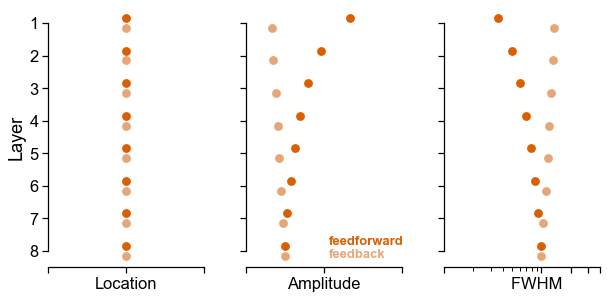

In [8]:
g = sns.catplot(y='layer', x='value',  col='param', col_order=['loc_deg', 'amp', 'fwhm_deg'],
                hue='model', hue_order=['forward', 'reverse'], palette=pal, 
                kind='point',  dodge=.3, join=False, orient='h', 
                height=4.5, aspect=.65,  sharey=True, sharex=False, legend=False,
                data=pmod_plot.query("stim_size==15 & filter_sigma==15 &n_layers==8"))


g.axes[0][2].set_xscale('log')
plt.setp(g.axes[0][2].get_xminorticklabels(), visible=False)

g.axes[0][0].set(xticks=[-.01, 0, .01], xticklabels=["", "Location", ""], xlabel='')
g.axes[0][1].set(xticks=[0, .75, 1.5], xticklabels=["", "Amplitude", ""], xlabel='')
g.axes[0][2].set(xticks=[10, 100, 200, 300, 400], 
                 xticklabels=["", "FWHM  ", "", "", ""], xlabel='')
g.set(ylim=[7.5, -.5])
g.set_ylabels('Layer')
g.set_titles('')

g.axes[0][1].text(.8, 6.8, 'feedforward', fontsize=13, fontweight='demibold', c=pal[0])
g.axes[0][1].text(.8, 7.2, 'feedback', fontsize=13, fontweight='demibold', c=pal[1])

sns.despine(trim=True)
plt.gcf().tight_layout(w_pad=2)